In [2]:
import temp_utils
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [4]:
#== READ ==#
filepath = r'/home/bla390/control_run/atmos_daily_1500_01_01.nc.isobaric'
dataVars = xr.open_dataset(filepath, chunks={'time': 1})

In [5]:
#== COMPUTE ==#
qu = dataVars.ucomp * dataVars.sphum
qv = dataVars.vcomp * dataVars.sphum

qu_int = temp_utils.integrate(qu, over_dim="level", x=(qu["level"] * 100) / 9.81)
qv_int = temp_utils.integrate(qv, over_dim="level", x=(qv["level"] * 100) / 9.81)

IVT = np.sqrt(np.square(qu_int) + np.square(qv_int))

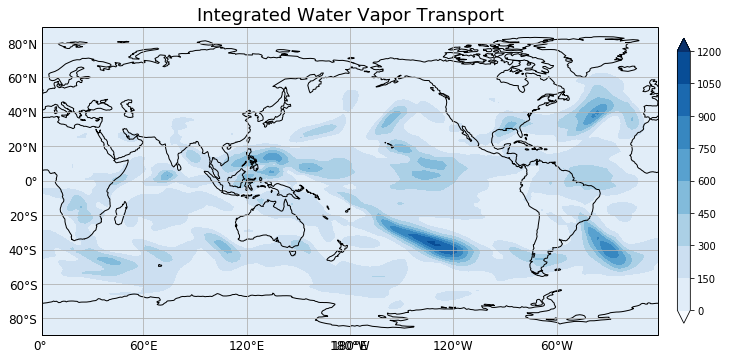

In [6]:
#== PLOT ==#

fig = plt.figure(figsize=(10, 8))
gsFig = plt.GridSpec(1, 1)
gsFig.update(left=0.05, right=0.95, bottom = 0.10, top = 0.90, wspace=0.00, hspace = 0.00)
axFig = plt.subplot(gsFig[0, 0], projection=ccrs.PlateCarree(180))
image = IVT[0].plot.contourf(ax=axFig, levels = 11, cmap=plt.cm.Blues, add_colorbar=False, 
                                   extend='both', transform=ccrs.PlateCarree())
axFig.coastlines()

#--Modify gridlines
gl = axFig.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False ; gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER ; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12} ; gl.ylabel_style = {'size': 12}

#--Fix colorbar
cbar = plt.colorbar(image, ax=axFig, fraction=0.02, pad=0.03)

#--Labels
axFig.set_title('Integrated Water Vapor Transport',fontsize=18)

#--Save figure
plt.savefig('/home/bla390/control_run/images/IVT.png')